In [2]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
 
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
 
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
# Define labels for the target variable
LABELS = ["Show", "No Show"]

In [3]:
import psutil
print(psutil.__version__)

6.0.0


In [4]:
df = pd.read_csv('data/no_show.csv')

In [5]:
df.head()

,Gender,Age,Alcohol_Consumption,Hypertension,Diabetes,Appointment_Date,Schedule_Date,Clinic_Location,Specialty,Neighborhood,clinic,lat,long,neighborho,target_no_show
0,F,43,5/week,False,False,2021-01-14 10:30:00,2020-10-26,Mission Bay,Human Performance Center,Russian Hill,Mission Bay,37.764124,-122.456572,Russian Hill,False
1,F,43,5/week,False,False,2021-01-14 10:30:00,2020-10-26,Mission Bay,Human Performance Center,Russian Hill,Mission Bay,37.784882,-122.438723,Russian Hill,False
2,F,43,5/week,False,False,2021-01-14 10:30:00,2020-10-26,Mission Bay,Human Performance Center,Russian Hill,Mission Bay,37.766561,-122.389948,Russian Hill,False
3,F,37,0/week,False,True,2021-02-17 14:00:00,2021-01-25,Mission Bay,"Endocrine, Diabetes & Pregnancy Program",Ocean View,Mission Bay,37.764124,-122.456572,Ocean View,False
4,F,37,0/week,False,True,2021-02-17 14:00:00,2021-01-25,Mission Bay,"Endocrine, Diabetes & Pregnancy Program",Ocean View,Mission Bay,37.784882,-122.438723,Ocean View,False


#Shape of the Dataset

In [6]:
df.shape

(132202, 15)

##DataSet Information

Gender :  Male/Female
Age     
Alcohol Comsumption :  Days/Week
Hypertension    :      The values 0 and 1 are likely representing the absence or presence of hypertension (high blood pressure) in the patients.

0: Indicates that the patient does not have hypertension.
1: Indicates that the patient does have hypertension.

Diabetes    :  The Diabetes column, the values '0' and '1' also represent the absence or presence of diabetes in the patients:

0: Indicates that the patient does not have diabetes.
1: Indicates that the patient does have diabetes.

Appointment Date : The "Appointment Date" column contains datetime values, which include both the date and time of the scheduled appointments. The format you're seeing, such as 2021-01-14 10:30:00.0000000, represents the date and time of the appointment down to the nanosecond level.

Date Part (YYYY-MM-DD): This is the day when the appointment is scheduled. For example, 2021-01-14 means the appointment is on January 14th, 2021.

Time Part (HH:MM
): This is the time when the appointment is scheduled on that day. For example, 10:30:00 means the appointment is at 10:30 AM.

Schedule_Date : The values in the schedule_Data column represent timestamps, specifically the date and time when certain events were scheduled. Each value follows the format YYYY-MM-DD HH:MM:SS.sssssss, where:

YYYY is the year (e.g., 2020, 2021).
MM is the month (e.g., 10 for October, 01 for January).
DD is the day of the month.
HH:MM:SS represents the hour, minute, and second of the day (in 24-hour format).
.sssssss represents fractional seconds, often used for precision but is typically zeroed out if not required.

For example:

2020-10-26 00:00:00.0000000 means the event was scheduled for October 26, 2020, at midnight.
2021-06-29 00:00:00.0000000 means the event was scheduled for June 29, 2021, at midnight.

Clinic_Location : 
Speciality
Neighborhood
lat
long
target_no_show


Data Checks to Perform

Check Missing Values 

Check Duplicates

Check Data Type

Check the number of unique values of each columns

Check statistics of data set 

Check various categories present in the different categorical columns

In [7]:
# Check Missing Values :
df.isna().sum()

Gender                     0
Age                        0
Alcohol_Consumption        0
Hypertension               0
Diabetes                   0
Appointment_Date           0
Schedule_Date              0
Clinic_Location            0
Specialty                  0
Neighborhood               0
clinic                 53902
lat                    53902
long                   53902
neighborho                 0
target_no_show             0
dtype: int64

In [9]:
#Removing clinic , lat, long

df = df.drop(columns=['clinic', 'lat', 'long'])


In [10]:
#Check Duplicate :

df.duplicated().sum()

np.int64(52202)

In [11]:
duplicates = df[df.duplicated()]
print(duplicates.head())

   Gender  Age Alcohol_Consumption  Hypertension  Diabetes  \
1       F   43              5/week         False     False   
2       F   43              5/week         False     False   
4       F   37              0/week         False      True   
5       F   37              0/week         False      True   
11      M   64              1/week          True     False   

       Appointment_Date Schedule_Date Clinic_Location  \
1   2021-01-14 10:30:00    2020-10-26     Mission Bay   
2   2021-01-14 10:30:00    2020-10-26     Mission Bay   
4   2021-02-17 14:00:00    2021-01-25     Mission Bay   
5   2021-02-17 14:00:00    2021-01-25     Mission Bay   
11  2021-09-01 17:30:00    2021-06-09     Mission Bay   

                                  Specialty   Neighborhood     neighborho  \
1                  Human Performance Center   Russian Hill   Russian Hill   
2                  Human Performance Center   Russian Hill   Russian Hill   
4   Endocrine, Diabetes & Pregnancy Program     Ocean

In [12]:
df.drop_duplicates(inplace=True)


In [13]:
print(df.duplicated().sum())


0


In [14]:
#Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 0 to 132199
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               80000 non-null  object
 1   Age                  80000 non-null  int64 
 2   Alcohol_Consumption  80000 non-null  object
 3   Hypertension         80000 non-null  bool  
 4   Diabetes             80000 non-null  bool  
 5   Appointment_Date     80000 non-null  object
 6   Schedule_Date        80000 non-null  object
 7   Clinic_Location      80000 non-null  object
 8   Specialty            80000 non-null  object
 9   Neighborhood         80000 non-null  object
 10  neighborho           80000 non-null  object
 11  target_no_show       80000 non-null  bool  
dtypes: bool(3), int64(1), object(8)
memory usage: 6.3+ MB


In [15]:
#Checking the number of unique values of each column
df.nunique()

Gender                     2
Age                       98
Alcohol_Consumption        5
Hypertension               2
Diabetes                   2
Appointment_Date       19679
Schedule_Date            680
Clinic_Location            9
Specialty                267
Neighborhood              37
neighborho                37
target_no_show             2
dtype: int64

In [16]:
df.describe()

,Age
count,80000.000000
mean,39.692950
std,14.612274
min,1.000000
25%,30.000000
50%,40.000000
75%,50.000000
max,99.000000


In [17]:
df.head()

,Gender,Age,Alcohol_Consumption,Hypertension,Diabetes,Appointment_Date,Schedule_Date,Clinic_Location,Specialty,Neighborhood,neighborho,target_no_show
0,F,43,5/week,False,False,2021-01-14 10:30:00,2020-10-26,Mission Bay,Human Performance Center,Russian Hill,Russian Hill,False
3,F,37,0/week,False,True,2021-02-17 14:00:00,2021-01-25,Mission Bay,"Endocrine, Diabetes & Pregnancy Program",Ocean View,Ocean View,False
6,F,54,> 14/week,False,False,2020-09-22 16:30:00,2020-04-01,Parnassus,Metabolic Bone Clinic,Pacific Heights,Pacific Heights,False
7,F,17,0/week,False,False,2021-07-15 14:15:00,2021-06-29,Mount Zion,Facial Plastic and Reconstructive Surgery Clinic,Pacific Heights,Pacific Heights,False
8,F,28,5/week,False,False,2020-03-20 16:00:00,2020-02-03,Mount Zion,Diabetes Clinic at Mount Zion,Presidio,Presidio,False


In [19]:
# Display unique values for each column
unique_values = {
    'Gender': df['Gender'].unique(),
    'Age': df['Age'].unique(),
    'Alcohol_Consumption': df['Alcohol_Consumption'].unique(),
    'Hypertension': df['Hypertension'].unique(),
    'Diabetes': df['Diabetes'].unique(),
    'Appointment_Date': df['Appointment_Date'].unique(),
    'Schedule_Date': df['Schedule_Date'].unique(),
    'Clinic_Location': df['Clinic_Location'].unique(),
    'Specialty': df['Specialty'].unique(),
    'Neighborhood': df['Neighborhood'].unique(),
    'neighborho': df['neighborho'].unique(),
    'target_no_show': df['target_no_show'].unique()
}

# Print unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in '{column}':")
    print(values)
    print()


Unique values in 'Gender':
['F' 'M']

Unique values in 'Age':
[43 37 54 17 28 64 59 56 42 44 79 15 48 68 26 71 22 60 47 35 29 31 33 50
 40 57 24 32 25 39 23 45  8 18 41 53 34 70 36 30 55 38 52 58 49 20 66  5
 16 11 63 61 46 73  9 27 51 21  7 77 67 19 62 14 13  2 12 72 69  6 75 10
 65  4  3 78 82 80 74 93 76 81  1 94 85 88 86 98 89 83 84 91 96 92 90 87
 97 99]

Unique values in 'Alcohol_Consumption':
['5/week' '0/week' '> 14/week' '10/week' '1/week']

Unique values in 'Hypertension':
[False  True]

Unique values in 'Diabetes':
[False  True]

Unique values in 'Appointment_Date':
['2021-01-14 10:30:00' '2021-02-17 14:00:00' '2020-09-22 16:30:00' ...
 '2021-01-15 17:00:00' '2021-09-27 14:30:00' '2020-01-07 12:30:00']

Unique values in 'Schedule_Date':
['2020-10-26' '2021-01-25' '2020-04-01' '2021-06-29' '2020-02-03'
 '2021-02-08' '2021-06-09' '2020-03-04' '2019-11-12' '2020-09-01'
 '2020-02-28' '2020-12-02' '2021-12-10' '2021-11-08' '2021-02-09'
 '2020-02-27' '2021-04-14' '2020-07-08' '202

In [20]:
# Check if 'Neighborhood' and 'neighborho' columns are identical
are_identical = df['Neighborhood'].equals(df['neighborho'])
print(f"Are 'Neighborhood' and 'neighborho' identical? {are_identical}")


Are 'Neighborhood' and 'neighborho' identical? True


In [21]:
df = df.drop(columns=['neighborho'])


In [23]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

# Print the number of columns in each category
print("Number of Numerical Columns:", len(numerical_columns))
print("Number of Categorical Columns:", len(categorical_columns))

# Optional: Print the column names as well
print("\nNumerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)



Number of Numerical Columns: 1
Number of Categorical Columns: 10

Numerical Columns:
Index(['Age'], dtype='object')

Categorical Columns:
Index(['Gender', 'Alcohol_Consumption', 'Hypertension', 'Diabetes',
       'Appointment_Date', 'Schedule_Date', 'Clinic_Location', 'Specialty',
       'Neighborhood', 'target_no_show'],
      dtype='object')


In [24]:
df.head(2)

,Gender,Age,Alcohol_Consumption,Hypertension,Diabetes,Appointment_Date,Schedule_Date,Clinic_Location,Specialty,Neighborhood,target_no_show
0,F,43,5/week,False,False,2021-01-14 10:30:00,2020-10-26,Mission Bay,Human Performance Center,Russian Hill,False
3,F,37,0/week,False,True,2021-02-17 14:00:00,2021-01-25,Mission Bay,"Endocrine, Diabetes & Pregnancy Program",Ocean View,False


1. Histograms for Numerical Data:

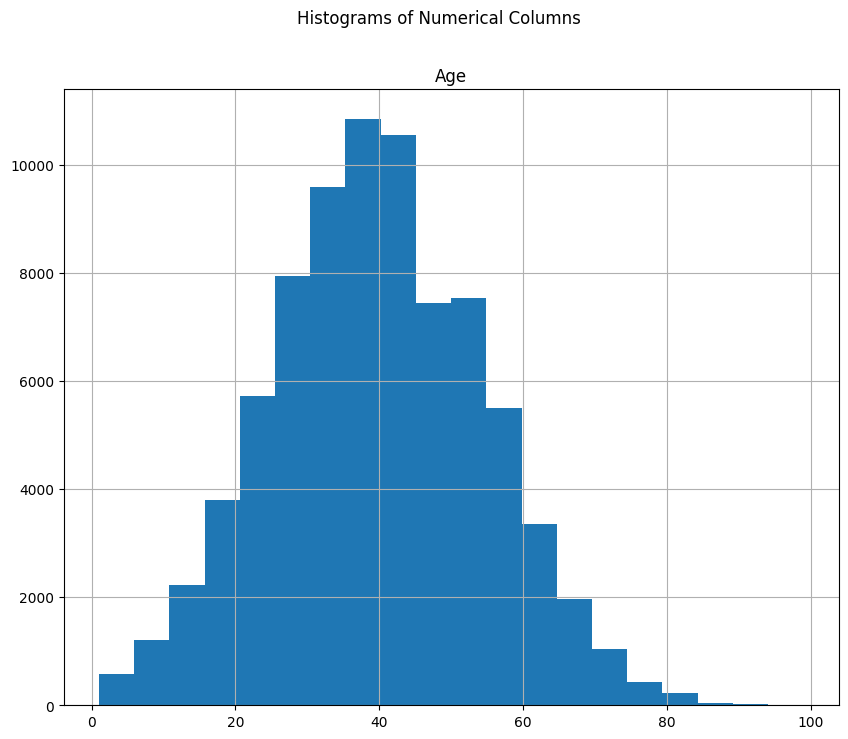

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_columns].hist(figsize=(10, 8), bins=20)
plt.suptitle("Histograms of Numerical Columns")
plt.show()


2. Distribution Plots for Numerical Data:

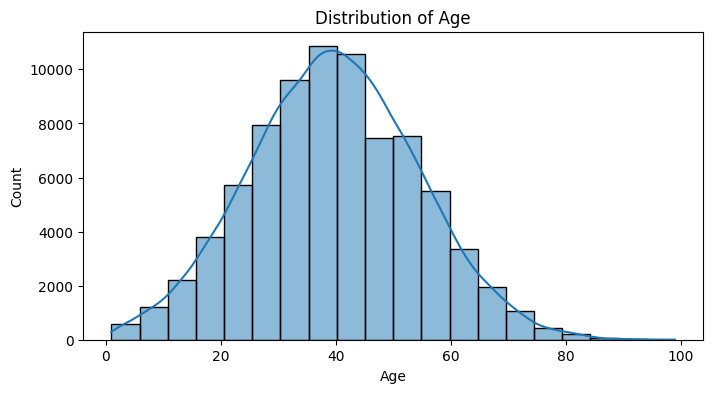

In [26]:
# Plot distribution for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()


3. Bar Plots for Categorical Data:

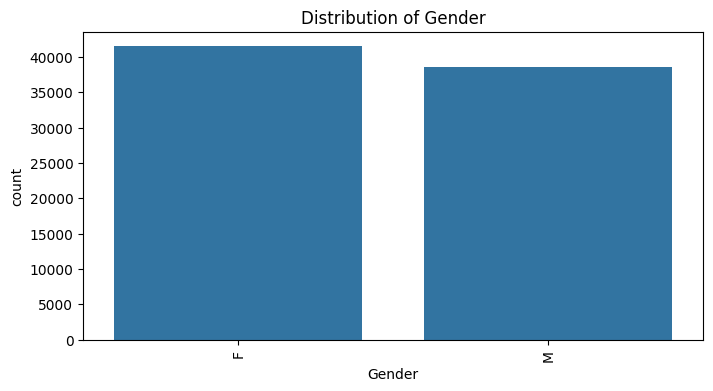

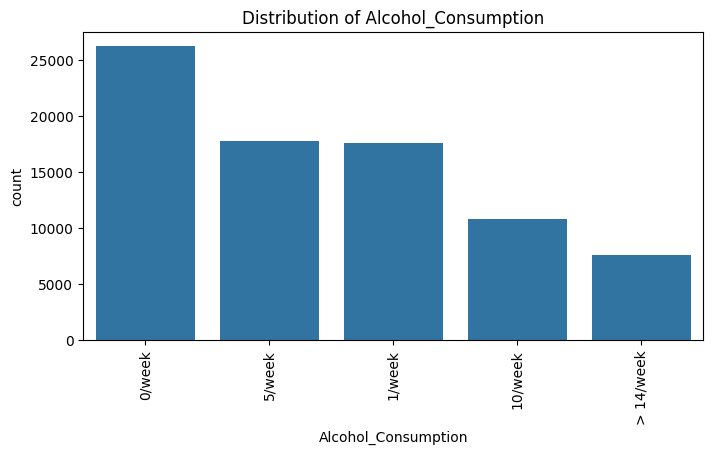

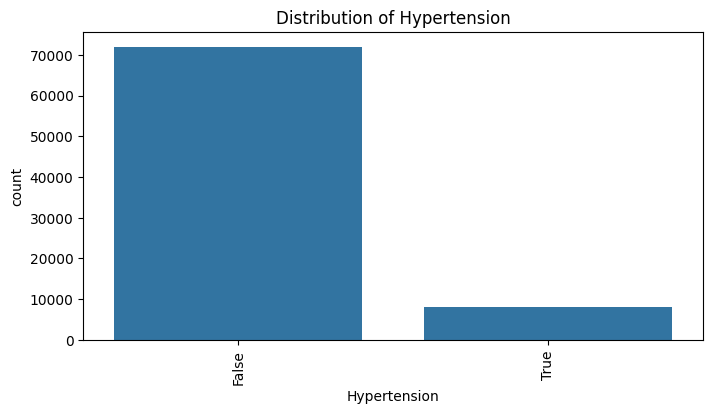

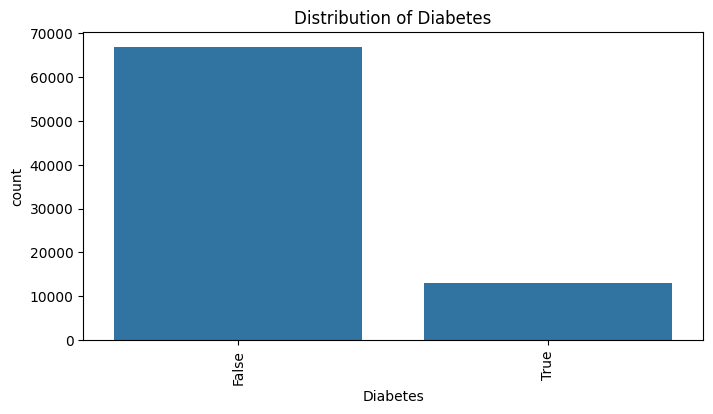

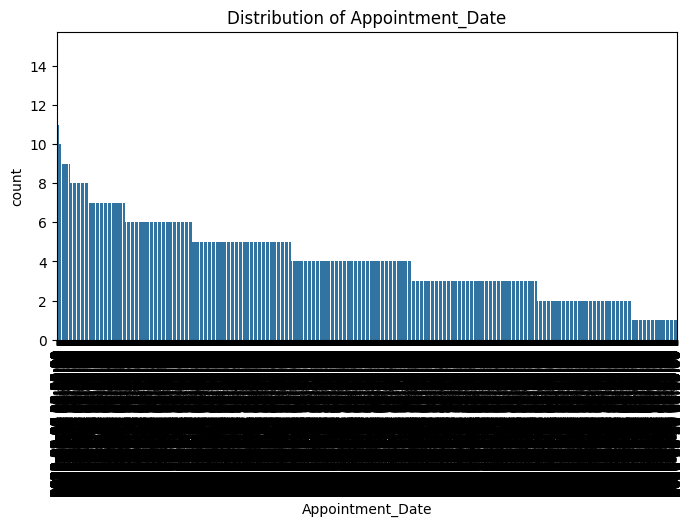

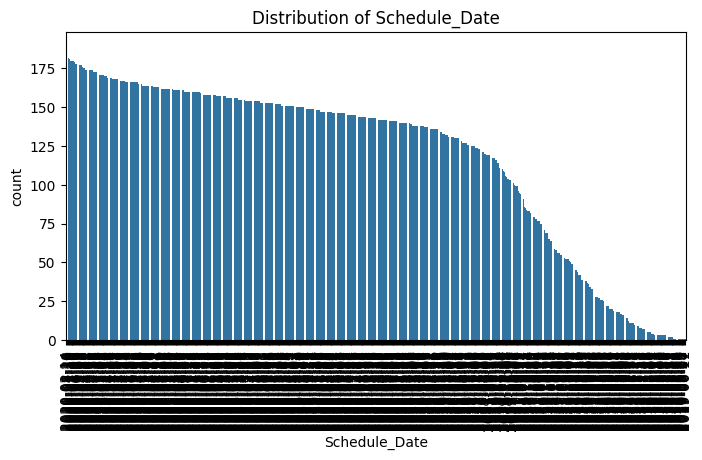

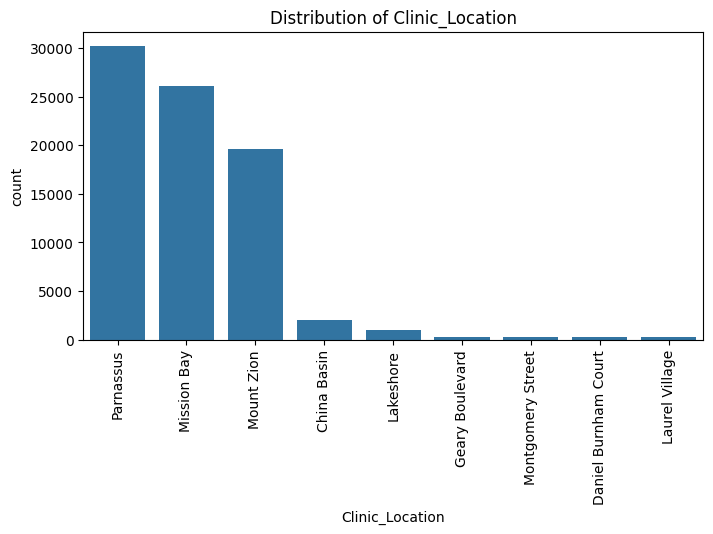

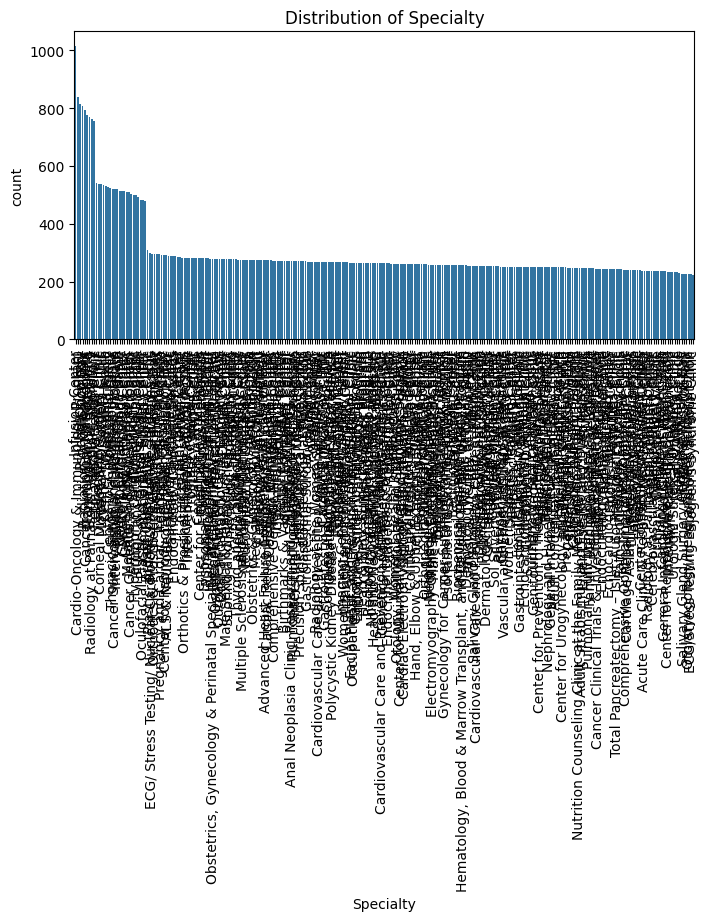

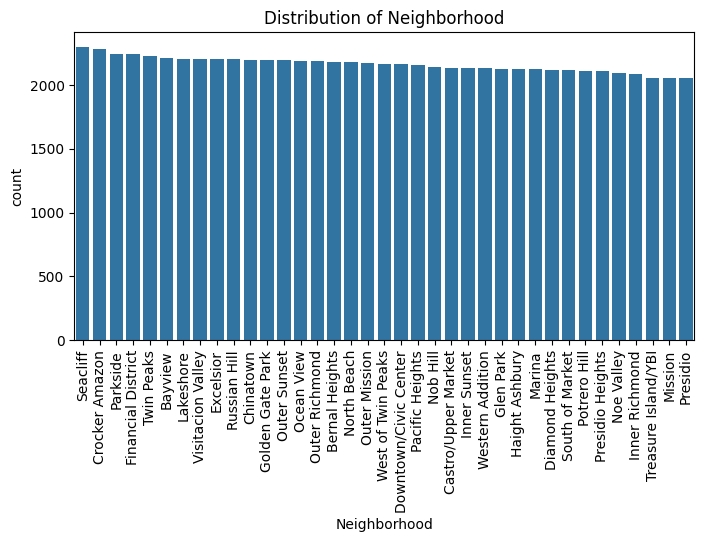

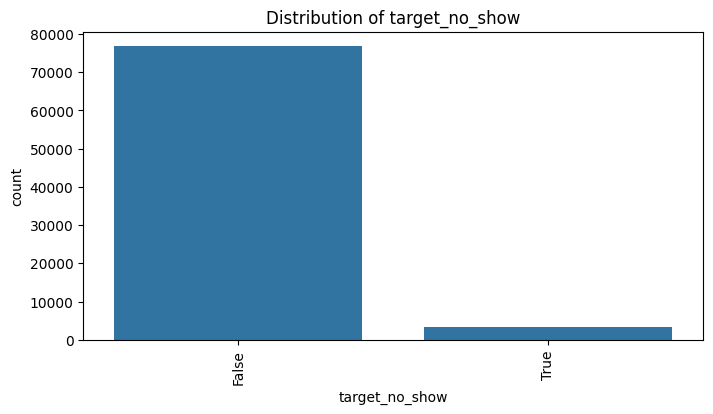

In [27]:
# Plot bar plots for categorical columns
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[column], order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()


In [28]:
# Display unique values and their counts for Clinic_Location
clinic_location_unique = df['Clinic_Location'].unique()
clinic_location_count = len(clinic_location_unique)

print(f"Unique Clinic_Location names: {clinic_location_unique}")
print(f"Number of unique Clinic_Location: {clinic_location_count}")

# Display unique values and their counts for Neighborhood
neighborhood_unique = df['Neighborhood'].unique()
neighborhood_count = len(neighborhood_unique)

print(f"Unique Neighborhood names: {neighborhood_unique}")
print(f"Number of unique Neighborhood: {neighborhood_count}")


Unique Clinic_Location names: ['Mission Bay' 'Parnassus' 'Mount Zion' 'China Basin' 'Lakeshore'
 'Daniel Burnham Court' 'Montgomery Street' 'Geary Boulevard'
 'Laurel Village']
Number of unique Clinic_Location: 9
Unique Neighborhood names: ['Russian Hill' 'Ocean View' 'Pacific Heights' 'Presidio'
 'Downtown/Civic Center' 'Outer Mission' 'Castro/Upper Market'
 'Potrero Hill' 'Noe Valley' 'Diamond Heights' 'Excelsior'
 'Western Addition' 'Mission' 'Chinatown' 'Visitacion Valley'
 'Outer Sunset' 'Treasure Island/YBI' 'Crocker Amazon' 'Inner Sunset'
 'Lakeshore' 'Parkside' 'Bernal Heights' 'Nob Hill' 'West of Twin Peaks'
 'Glen Park' 'North Beach' 'Financial District' 'Twin Peaks' 'Seacliff'
 'Haight Ashbury' 'Bayview' 'Presidio Heights' 'Inner Richmond' 'Marina'
 'Golden Gate Park' 'Outer Richmond' 'South of Market']
Number of unique Neighborhood: 37
